In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

In [19]:
sns.set_theme()


In [20]:
def rew_vs_metric(c, label=None):
    c_ext = c['ext_reward']
    c_metric = c['metric']
    sns.lineplot(x=c_ext, y=c_metric, label=label)


In [33]:
def updates_vs_metric(c, label=None):
    c_updates = c['n_updates']
    c_metric = c['metricmean']
    c_metric_std = 0.3*c['metricstd']
    sns.lineplot(x=c_updates, y=c_metric, label=label)
    plt.fill_between(c_updates, c_metric - c_metric_std, c_metric + c_metric_std, alpha=.3)
    plt.ylim(bottom=0)

In [34]:
def updates_vs_rew(c, label=None):
    c_updates = c['n_updates']
    c_rew = c['rew_mean_ext']
    c_rew_std = 0.1*c['rew_std_ext']
    sns.lineplot(x=c_updates, y=c_rew, label=label)
    plt.fill_between(c_updates, c_rew - c_rew_std, c_rew + c_rew_std, alpha=.3)


In [35]:
new = pd.read_csv('results/'+'ppo.csv')

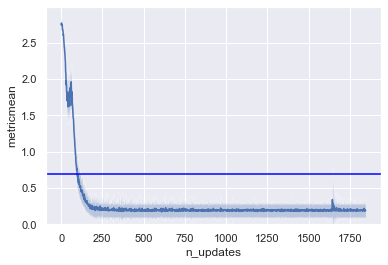

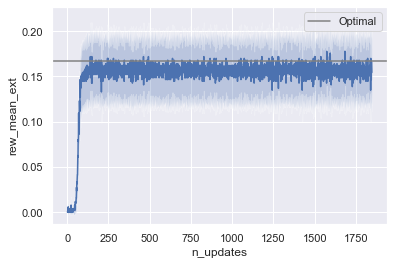

In [36]:
# rew_vs_metric(new)
# plt.show()
updates_vs_metric(new)
p_min = 1/2
l = torch.tensor([p_min]+[(1-p_min)/15]*15)
hline = F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))
plt.axhline(hline, label="Safety threshold", color='blue')
plt.show()
updates_vs_rew(new)
plt.axhline(1/6, label="Optimal", color='grey')
plt.legend()
plt.show()

In [ ]:
# Agent trades off between reward and being predictable. If above chosen safety threshold, we penalize being unpredictable. Penalty increases when agent is above threshold, and vice-versa.


#Next steps/use case. Put agent into new environment without reward, but with e.g. different 'holes' and see that metric goes up. This simulates deployment.


## Calculate initial value and tuning

In [37]:
p_min = 1/2
l = torch.tensor([p_min]+[(1-p_min)/15]*15)
F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))

tensor(0.6931)

In [38]:
l = torch.tensor([1/16]*16)
# This is what we want our linear interpolation to start with
start_value = 0.5
np.log(2/(1+start_value) - 1)/-F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))

tensor(0.3962)

In [39]:
# boundary
l = torch.tensor([1/16]*16)
# This is what we want our linear interpolation to start with
start_value = 0.99
np.log(2/(1+start_value) - 1)/-F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))

tensor(1.9092)